In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import time
from IPython.display import clear_output

In [42]:
x = np.array([0.50,0.75,1.00,1.25,1.5,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])
y = np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])

In [364]:
boston = datasets.load_boston()
data = boston['data']
target = boston['target']


In [365]:
def untransformMaker(minval,r):
    return lambda x: (x*r + minval)
def transformMaker(minval, r):
    return lambda x: (x-minval)/r
transforms = list()
untransforms = list()
for f in range(data.shape[1]):
    minval = np.min(data[:,f])
    maxval = np.max(data[:,f])
    r = maxval - minval
    data[:,f] = (data[:,f]-minval)/r
    transforms.append(transformMaker(minval,r))
    untransforms.append(untransformMaker(minval,r))


In [353]:
def update(x, y, w, b, alpha):
    N = len(x)    
    dw = 0.0
    db = 0.0
    pred = np.matmul(w,x.T)+b
    dw = 2*np.matmul(x.T,(pred-y))
    db = 2*(pred-y)
    w -= dw*alpha/N
    b -= db*alpha/N
    return w,b

def avg_loss(x,y,w,b):
    N = x.shape[0]
    pred = np.matmul(w,x.T)+b
    cost = np.sum(np.square(pred-y))
    return cost/N


In [355]:
d = data
w = np.zeros([data.shape[1]])
b = 0
alpha = .001
for i in range(25000):
    w,b = update(d,target,w,b,alpha)    
    if i%500==0:
        #clear_output()    
        print(i,avg_loss(d,target,w,b))

#x = np.arange(4.,10.,.1)
#prediction = w*x+b
#plt.plot(d,target,'.')
#plt.plot(x,prediction)    

0 587.0681435302901
500 107.6078265535123
1000 82.69249871639785
1500 69.43716423854217
2000 61.523658575677956
2500 56.46592656896913
3000 52.96814018998982
3500 50.35016075146966
4000 48.25216468084174
4500 46.481288585652244
5000 44.931967885043136
5500 43.54452453238563
6000 42.28361095426585
6500 41.1269652673535
7000 40.05952403582645
7500 39.070321262509346
8000 38.150838624976096
8500 37.29411357205557
9000 36.49424490018889
9500 35.74610829438422
10000 35.045184080811566
10500 34.387446071215024
11000 33.76928462616358
11500 33.187449688791716
12000 32.639006129231106
12500 32.121297191659565
13000 31.63191365579638
13500 31.168667294207072
14000 30.729567731898484
14500 30.312802106434752
15000 29.91671709504755
15500 29.539802977265513
16000 29.180679467454077
16500 28.8380830971411
17000 28.51085596050947
17500 28.1979356625037
18000 27.898346330131027
18500 27.611190565176138
19000 27.335642231554793
19500 27.070939983456995
20000 26.816381451647107
20500 26.57131801507249

Text(0, 0.5, 'Value ($1000s)')

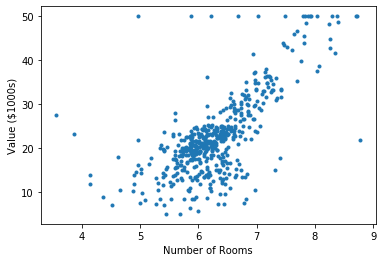

In [372]:
plt.plot(untransforms[5](data[:,5]),target,'.')
plt.xlabel('Number of Rooms')
plt.ylabel('Value ($1000s)')
#plt.plot(x,prediction)


0.00632 88.9762
0.0 100.0
0.46 27.74
0.0 1.0
0.385 0.871
3.561 8.78
2.9 100.0
1.1296 12.1265
1.0 24.0
187.0 711.0
12.6 22.0
0.32 396.9
1.73 37.97


In [294]:
w = np.zeros([data.shape[1]])
dw = np.zeros(w.shape)
b = 0
idx = 30
val = data[idx,:]
y = target[idx]
pred = predict(val,w,b)
dw += 2*val*(pred-y)
print(val)
print(pred)
print(y)
print(dw)

[  1.13081   0.        8.14      0.        0.538     5.713    94.1
   4.233     4.      307.       21.      360.17     22.6    ]
0.0
12.7
[  -28.722574     0.        -206.756        0.         -13.6652
  -145.1102   -2390.14      -107.5182    -101.6      -7797.8
  -533.4      -9148.318     -574.04    ]


In [290]:
w = np.zeros([data.shape[1]])
b = 0
idx = 30
dw = np.zeros(data.shape)
for idx in range(data.shape[0]):
    val = data[idx,:]
    y = target[idx]
    pred = predict(val,w,b)
    dw[idx,:] = 2*val*(pred-y)
print(val)
print(pred)
print(y)

array([-1.01530054e+02, -6.66433992e+02, -4.40964743e+02, -3.93438735e+00,
       -2.40886479e+01, -2.92190030e+02, -2.89557763e+03, -1.80687250e+02,
       -3.69348221e+02, -1.69478166e+04, -8.11528577e+02, -1.66326067e+04,
       -4.73514462e+02])

In [338]:
#minval = np.min(rawdata[:,0])
#maxval = np.max(rawdata[:,0])
#r = maxval - minval
#d = (rawdata[:,0]-minval)/r
#transform.append(lambda x:(x*r+minval))
print(rawdata[0,0])
print(data[0,0])
print(transform[0](data[0,0]))

0.00632
0.0
0.00632


In [304]:
o = np.ones(10)
p = np.ones(10)
q = np.dot(o,p)
print(o.shape)
print(p.shape)
print(q.shape)

(10,)
(10,)
()


In [303]:
print(q)

10.0


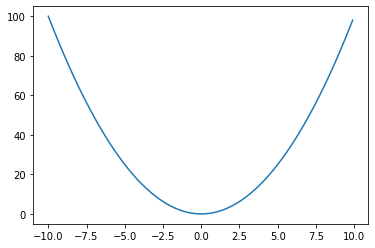

In [309]:
x = np.arange(-10,10,.1)
y = x**2
plt.plot(x,y)

In [356]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [371]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

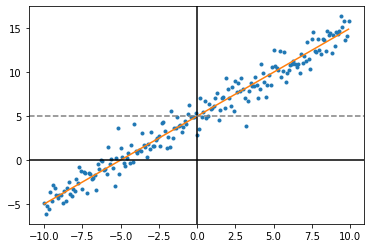

In [406]:
fig = plt.figure()
x = np.arange(-10,10,.1)
y = x+np.random.randn(x.shape[0]) + 5
plt.plot(x,y,'.')
plt.plot(x,x+5)
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.axhline(5, color='grey', linestyle='--')
plt.show()

In [382]:
y

array([ 0.63071612,  0.73071612,  0.83071612,  0.93071612,  1.03071612,
        1.13071612,  1.23071612,  1.33071612,  1.43071612,  1.53071612,
        1.63071612,  1.73071612,  1.83071612,  1.93071612,  2.03071612,
        2.13071612,  2.23071612,  2.33071612,  2.43071612,  2.53071612,
        2.63071612,  2.73071612,  2.83071612,  2.93071612,  3.03071612,
        3.13071612,  3.23071612,  3.33071612,  3.43071612,  3.53071612,
        3.63071612,  3.73071612,  3.83071612,  3.93071612,  4.03071612,
        4.13071612,  4.23071612,  4.33071612,  4.43071612,  4.53071612,
        4.63071612,  4.73071612,  4.83071612,  4.93071612,  5.03071612,
        5.13071612,  5.23071612,  5.33071612,  5.43071612,  5.53071612,
        5.63071612,  5.73071612,  5.83071612,  5.93071612,  6.03071612,
        6.13071612,  6.23071612,  6.33071612,  6.43071612,  6.53071612,
        6.63071612,  6.73071612,  6.83071612,  6.93071612,  7.03071612,
        7.13071612,  7.23071612,  7.33071612,  7.43071612,  7.53

In [407]:
breastCancer = datasets.load_breast_cancer()

In [408]:
breastCancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [95]:
def sigmoid(x,w=1,b=0):
    return 1/(1+np.exp(-(w*x +b)))


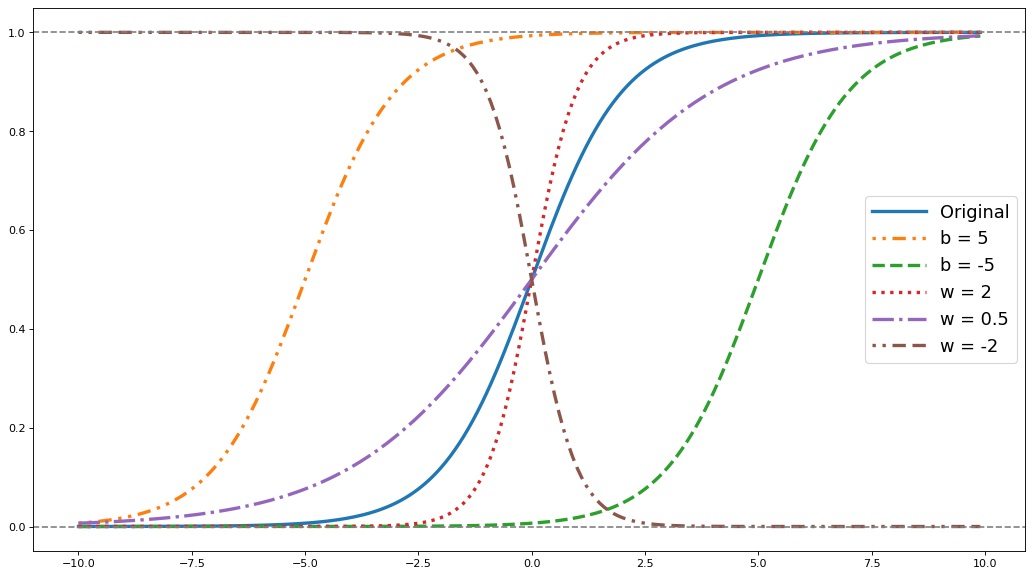

In [330]:
x = np.arange(-10,10,.1)
x = np.expand_dims(x,axis=1)
y = sigmoid(x,[1],0)
y2 = sigmoid(x,[1],5)
y3 = sigmoid(x,[1],-5)
y4 = sigmoid(x,[2],0)
y5 = sigmoid(x,[.5],0)
y6 = sigmoid(x,[-2],0)
plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(x,y,linewidth=3)
plt.plot(x,y2,linewidth=3,linestyle=(0,(1,2,1,2,4,2)))
plt.plot(x,y3,linewidth=3,linestyle='--')
plt.plot(x,y4,linewidth=3,linestyle=':')
plt.plot(x,y5,linewidth=3,linestyle='-.')
plt.plot(x,y6,linewidth=3,linestyle=(0,(1,2,1,2,4,2,4,2)))
plt.axhline(0, color='grey', linestyle='--')
plt.axhline(1, color='grey', linestyle='--')
plt.legend(['Original','b = 5', 'b = -5', 'w = 2', 'w = 0.5','w = -2'],fontsize=16,handlelength=3)

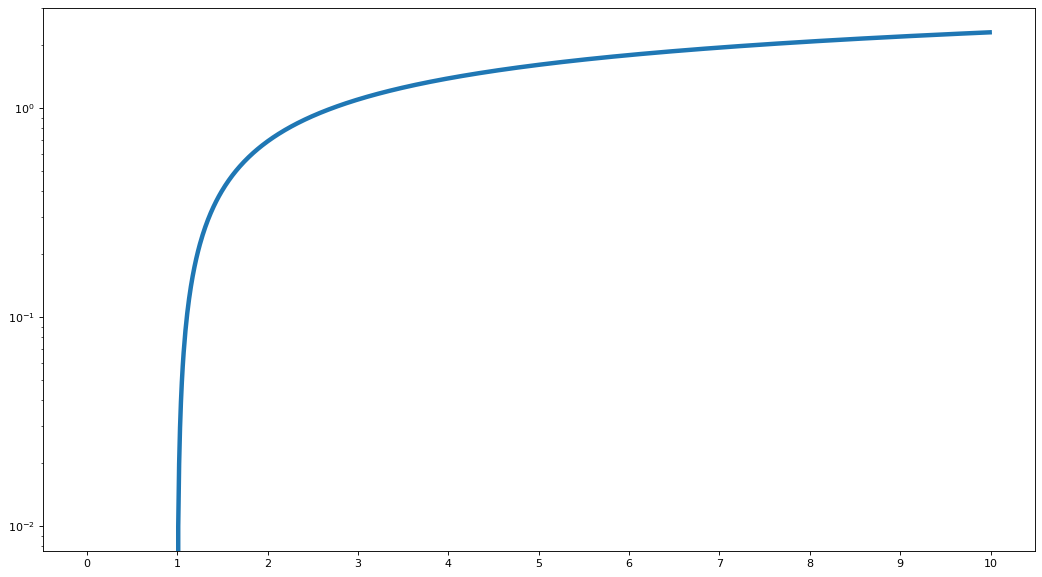

In [516]:
x = np.arange(0.01,10,0.01)
y = np.log(x)
plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x,y,linewidth=4)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yscale('log')
plt.show()


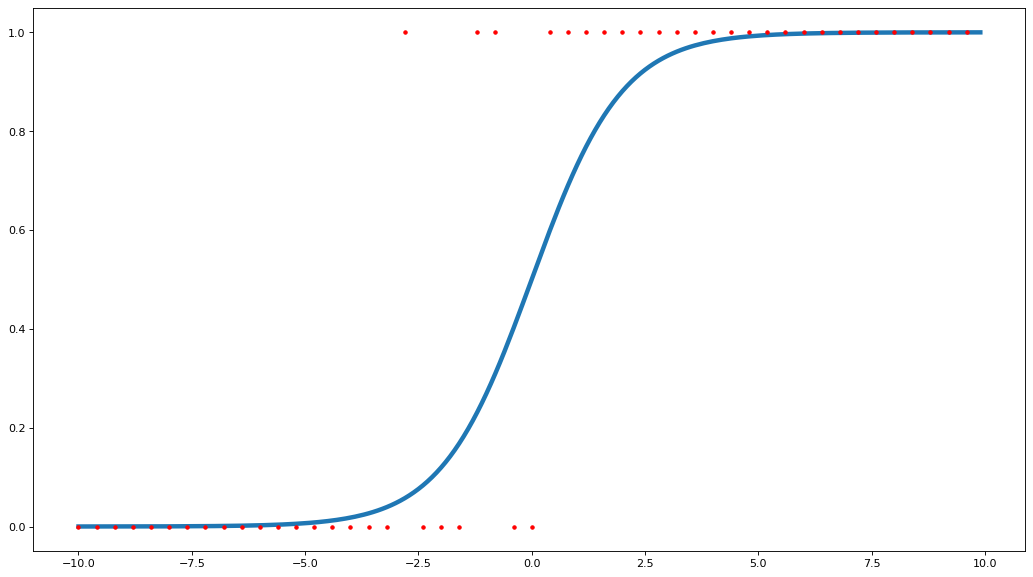

In [496]:
x = np.arange(-10,10,.1)
x = np.expand_dims(x,axis=1)
y = sigmoid(x,[1],0)
p = np.random.random(len(x))
q = np.zeros(p.shape)
for i in range(len(p)):
    if p[i]<y[i]:
        q[i] = 1
    else:
        q[i] = 0
plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x,y,linewidth=4)
plt.plot(x[0:-1:4],q[0:-1:4],'.',color='red',linewidth=18)
#plt.axhline(0, color='grey', linestyle='--')
#plt.axhline(1, color='grey', linestyle='--')


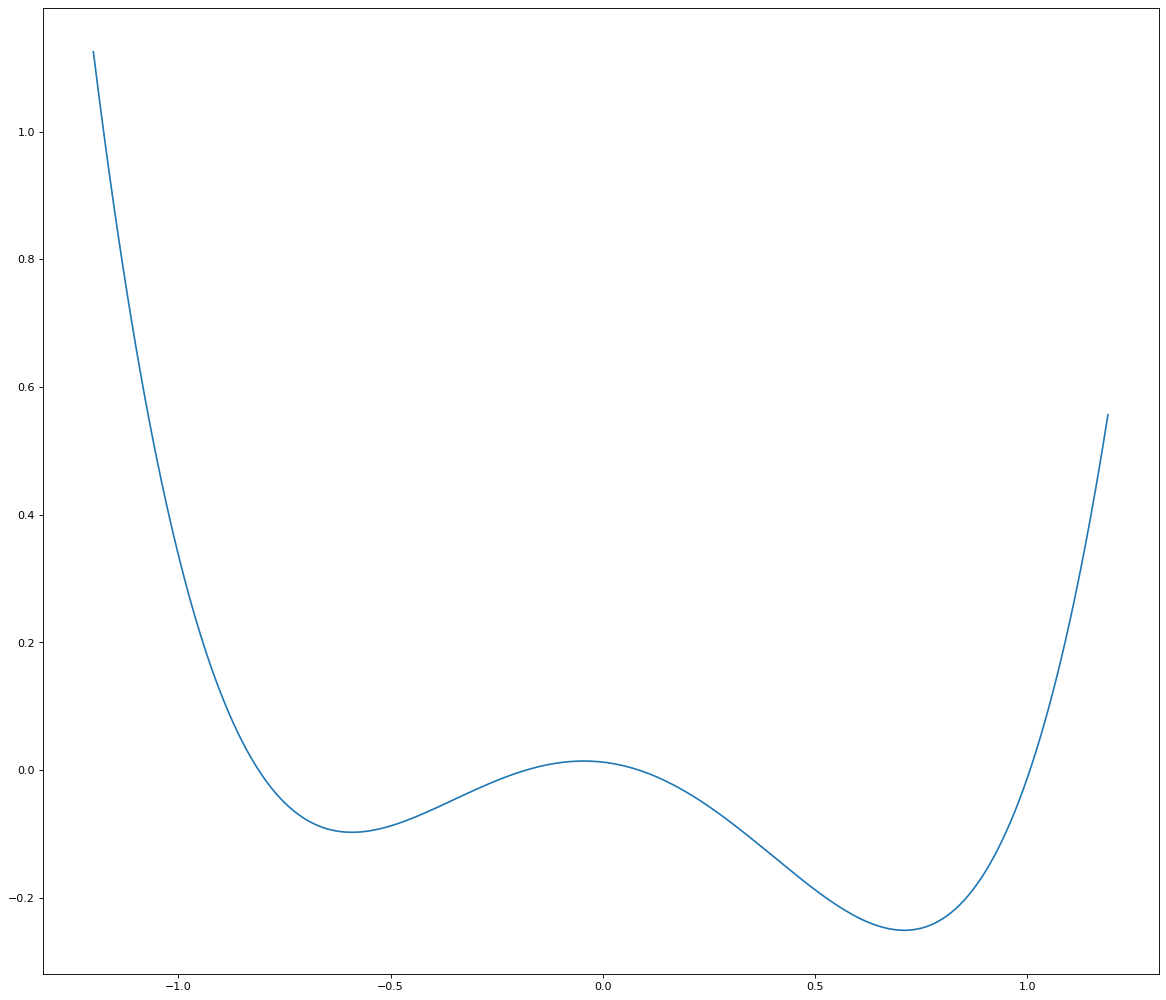

In [65]:
x = np.arange(-1.2,1.2,.01)
y = np.power(x,4)-np.power(x,2)-np.power(x-.5,3)/10
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x,y)


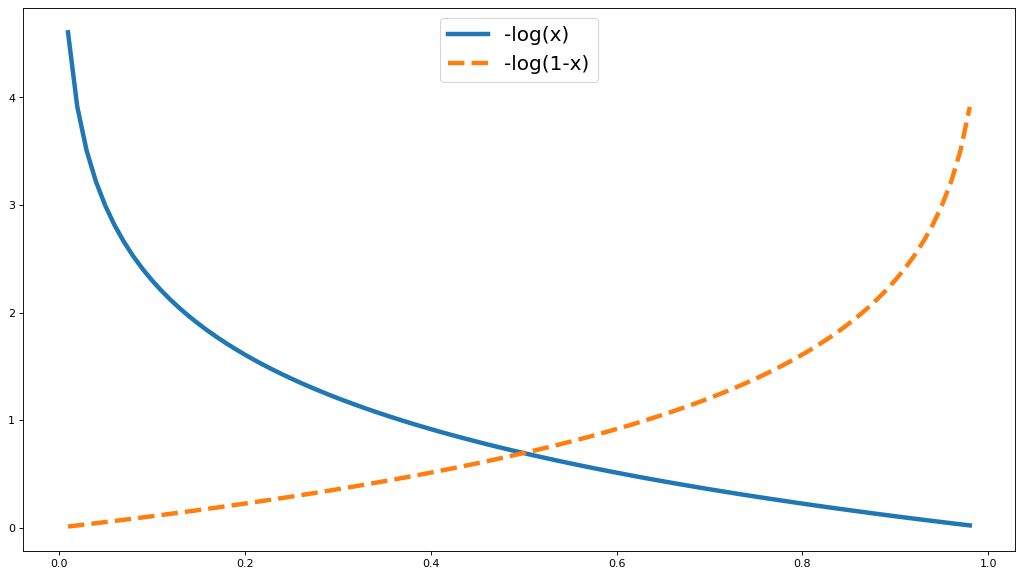

In [90]:
x = np.arange(0.01,.99,0.01)
y = -np.log(x)
y2 = -np.log(1-x)
plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x,y,linewidth=4)
plt.plot(x,y2,linestyle='--',linewidth=4)
plt.legend(['-log(x)','-log(1-x)'],fontsize=18,loc='upper center')



In [200]:
breastCancer = datasets.load_breast_cancer()
data = breastCancer['data']
target = breastCancer['target']

In [448]:
def untransformMaker(meanval, minval, maxval):
    return lambda x: (x-meanval)/max(abs(minval),maxval)
def transformMaker(meanval,minval,maxval):
    return lambda x: x*max(abs(minval),maxval) + meanval
transforms = list()
untransforms = list()
for f in range(data.shape[1]):
    meanval = np.mean(data[:,f])    
    minval = np.min(data[:,f])    
    maxval = np.max(data[:,f])
    transforms.append(transformMaker(meanval,minval,maxval))
    untransforms.append(untransformMaker(meanval,minval,maxval))    
    data[:,f] = transforms[-1](data[:,f])
    

In [475]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-np.matmul(w,x.T)-b))
def cost(pred,actual):        
    
    l = np.multiply(-actual,np.log(pred))
    r = np.multiply((1-actual),np.log(1-pred))
    l[l==-inf] = 0
    r[r==-inf] = 0
    return l+ r

def update(x, y, w, b, alpha):
    N = len(x)    
    dw = 0.0
    db = 0.0
    pred = sigmoid(x,w,b)    
    dw = np.matmul(x.T,(pred-y))
    db = np.sum((pred-y))
    w -= dw*alpha/N
    b -= db*alpha/N
    return w,b

def accuracy(x,y,w,b):
    pred = sigmoid(x,w,b)
    r = np.random.random(pred.shape)
    correct = 0
    for idx in range(len(pred)):
        p = 0
        #if pred[idx]>0.5:
        #    p = 1
        if r[idx] < pred[idx]:
            p = 1
        if p == y[idx]:
            correct+=1
    return correct/len(x)


0 0.5026362038664324
500 0.539543057996485
1000 0.5659050966608085
1500 0.5852372583479789
2000 0.6221441124780316
2500 0.6203866432337434
3000 0.6660808435852372
3500 0.671353251318102
4000 0.6854130052724078
4500 0.6836555360281195
5000 0.680140597539543
5500 0.7223198594024605
6000 0.7240773286467487
6500 0.6889279437609842
7000 0.7258347978910369
7500 0.7381370826010545
8000 0.7557117750439367
8500 0.7311072056239016
9000 0.7205623901581723
9500 0.7539543057996485
10000 0.7504393673110721
10500 0.7381370826010545
11000 0.7680140597539543
11500 0.7750439367311072
12000 0.7697715289982425
12500 0.8014059753954306
13000 0.7943760984182777
13500 0.7644991212653779
14000 0.789103690685413
14500 0.7768014059753954
15000 0.8137082601054482
15500 0.7926186291739895
16000 0.7978910369068541
16500 0.8172231985940246
17000 0.7996485061511424
17500 0.7768014059753954
18000 0.81195079086116
18500 0.8066783831282952
19000 0.8172231985940246
19500 0.8347978910369068
20000 0.81195079086116
20500 0

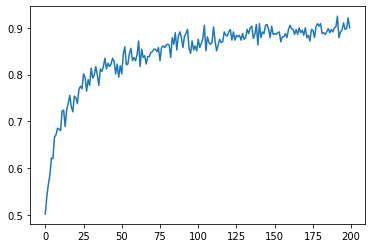

In [476]:
# we can select a single feature if we want by 
# setting this to data[:,featureNum]
d = data
# if we do, we need to make sure there are two dimensions
if d.ndim==1:
    d = np.expand_dims(d,axis=1)
w = np.zeros([d.shape[1]])
b = 0
alpha = .001 # the learning rate
history = list() # for seeing how accuracy improves over time
for i in range(100000):
	w,b = update(d,target,w,b,alpha)    
	if i%500==0:		
		acc = accuracy(d,target,w,b)
		print(i,acc)
		history.append((i,w,b,acc))
acc = [h[3] for h in history] # the accuracy vals
plt.plot(acc)

In [451]:
pred = sigmoid(d,w,b)
r = np.random.random(pred.shape)
out = np.zeros(r.shape)
correct = 0
for idx in range(len(r)):
    if pred[idx]>0.5:
        out[idx] = 1
    #if r[idx] < pred[idx]:
    #    out[idx] = 1
    #else:
    #    out[idx] = 0
    if out[idx] == target[idx]:
        correct+=1
        
print(correct/len(target))

0.8910369068541301


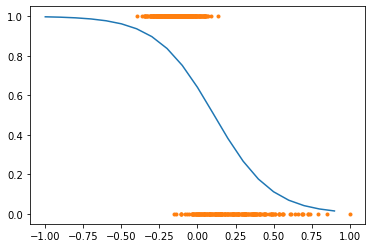

In [452]:
x = np.arange(-1,1,0.1)
x = np.expand_dims(x,axis=1)
pred = sigmoid(x,w,b)
plt.plot(x,pred)
plt.plot(d,target,'.')

In [185]:
np.log(0)

C:\Users\zackw.000\.conda\envs\insight\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [472]:
len(hist)

200

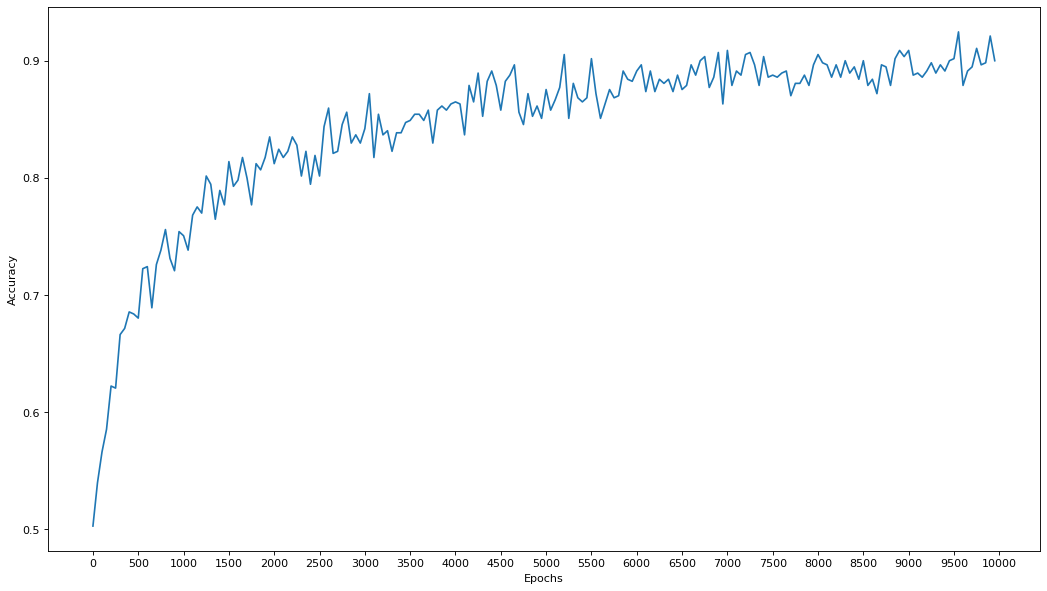

In [487]:
hist = [h[3] for h in history]
plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xticks(np.arange(0,300,10),np.arange(0,100500,500))
plt.plot(hist)

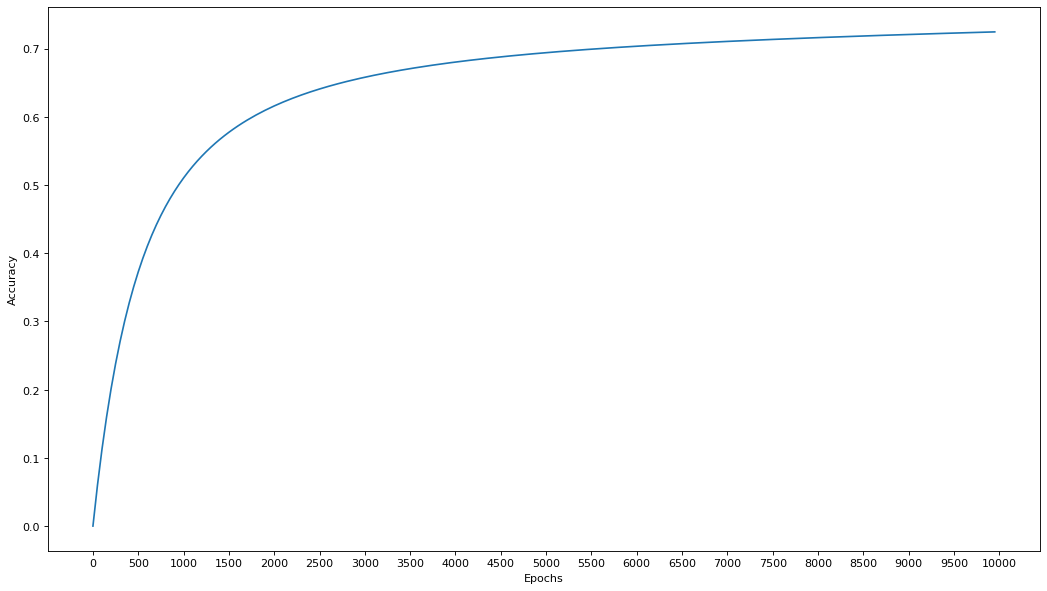

In [488]:
bhist = [h[2] for h in history]
plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xticks(np.arange(0,300,10),np.arange(0,100500,500))
plt.plot(bhist)

# Decision Tree

In [3]:
breast_cancer = datasets.load_breast_cancer()
data = breast_cancer['data']
target = breast_cancer['target']
print(breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [519]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [24]:
class node():
    def __init__(self):
        self.val = None
        self.parent = None
        self.left = None
        self.right = None   

def buildDecisionTree(parent,x,y):
    if parent==None:
        return
    splitTree(parent,x,y)
    left,right = splitSet(x,y,parent.val)
    decisionTree(parent.left,left[0],left[1])
    decisionTree(parent.right,right[0],right[1])
    
def splitTree(parent,x,y):
    ent = entropy(x,y)
    feature = 0
    curEntropy = 2
    # go through each feature and find the one that results in best (least) entropy
    for f in np.arange(x.shape[1]):
        splitVal, minEntropy = calcSplitPoint(x[:,f],y)
        if minEntropy < curEntropy:
            curEntropy = minEntropy
            feature = f
    parent.val = (f, splitVal)
    
def splitSet(x,y,val):    
    if x.ndim<2:
        x = np.expand_dims(x, axis=1)
    leftIdx = x[:,val[0]]<val[1]
    rightIdx = x[:,val[0]]>=val[1]
            
    v = val[1]
    left = (x[leftIdx,:],y[leftIdx])
    right = (x[rightIdx,:],y[rightIdx])
    return left, right

def entropy(x,y):
    # calculates entropy of a set
    if len(y)==0:
        return 0
    prY = PrY(x,y)    
    # to supress warnings/errors about trying to do log(0)
    if prY==0:
        return - (1 - prY)* np.log(1-prY)
    elif prY==1:
        return -prY * np.log(prY)
    else:
        return -prY * np.log(prY) - (1 - prY)* np.log(1-prY)

def PrY(x,y):
    # returns Pr(y = 1 | x) using a basic model of 1/N * sum(y)
    N = len(y)
    return np.sum(y)/N

def calcSplitPoint(x,y):    
    # calculate a split point based on a single feature (x is a N x 1 vector)
    N = len(y)    
    minEntropy = 2 # set to above maximum value to guarantee at least one split
    bestSplitVal = None
    for idx, v in enumerate(x):
        #print(idx)
        left, right = splitSet(x,y,(0,v))        
        H = entropy(left[0],left[1]) + entropy(right[0],right[1])
        if H < minEntropy:
            minEntropy = H
            bestSplitVal = v
    
    return bestSplitVal, minEntropy


In [26]:
x = data
y = target
parent = node()
splitTree(parent,x,y)
print(parent.val)
splitSet(x,y,parent.val)

(29, 0.173)


((array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
          1.189e-01],
         [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
          8.902e-02],
         [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
          8.758e-02],
         ...,
         [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
          7.820e-02],
         [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
          1.240e-01],
         [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
          7.039e-02]]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
         1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
         1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
         1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 

In [12]:
from sklearn.model_selection import train_test_split
x = data
y = target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)
parent = node()
buildDecisionTree(parent,x_train,y_train)

IndexError: too many indices for array

In [577]:
x = data[:,3]
y = target
val = calcSplitPoint(x,target)
left = (x[x<val],y[x<val])
right = (x[x>=val],y[x>=val])

(381, 30)
(569, 30)


In [568]:
left[0]

array([143.5, 178.8, 170.4])